In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def list_subdirectories(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    return subdirectories
directory_path = '/Users/namyata/Documents/Fall2023/Deep Learnning/Project/Dataset/birdclef-2023/train_audio'
subdirectories = list_subdirectories(directory_path)
print(len(subdirectories))
print(subdirectories)

264
['ruegls1', 'rewsta1', 'edcsun3', 'walsta1', 'grywrw1', 'pygbat1', 'abhori1', 'hartur1', 'tafpri1', 'spfwea1', 'lotcor1', 'afrthr1', 'whbcou1', 'refwar2', 'augbuz1', 'wbrcha2', 'rebfir2', 'bubwar2', 'rindov', 'kvbsun1', 'sichor1', 'golher1', 'rbsrob1', 'scthon1', 'libeat1', 'darbar1', 'yelbis1', 'spewea1', 'litwea1', 'mcptit1', 'gnhsun1', 'klacuc1', 'litegr', 'malkin1', 'witswa1', 'whctur2', 'bawman1', 'yebere1', 'somtit4', 'cohmar1', 'chtapa3', 'combuz1', 'brcwea1', 'whbwea1', 'whbcan1', 'bltbar1', 'categr', 'yertin1', 'eubeat1', 'gobsta5', 'afrgrp1', 'gybfis1', 'cabgre1', 'greegr', 'barswa', 'soucit1', 'wheslf1', 'didcuc1', 'grccra1', 'blacra1', 'squher1', 'gabgos2', 'grbcam1', 'brctch1', 'norpuf1', 'norbro1', 'huncis1', 'beasun2', 'whcpri2', 'grecor', 'shesta1', 'comsan', 'gyhneg1', 'blfbus1', 'bagwea1', 'macshr1', 'hoopoe', 'abythr1', 'brcale1', 'bltori1', 'wbswea1', 'piecro1', 'piekin1', 'varsun2', 'gytbar1', 'marsun2', 'refcro1', 'sacibi2', 'afghor1', 'fatwid1', 'gobbun1', 'p

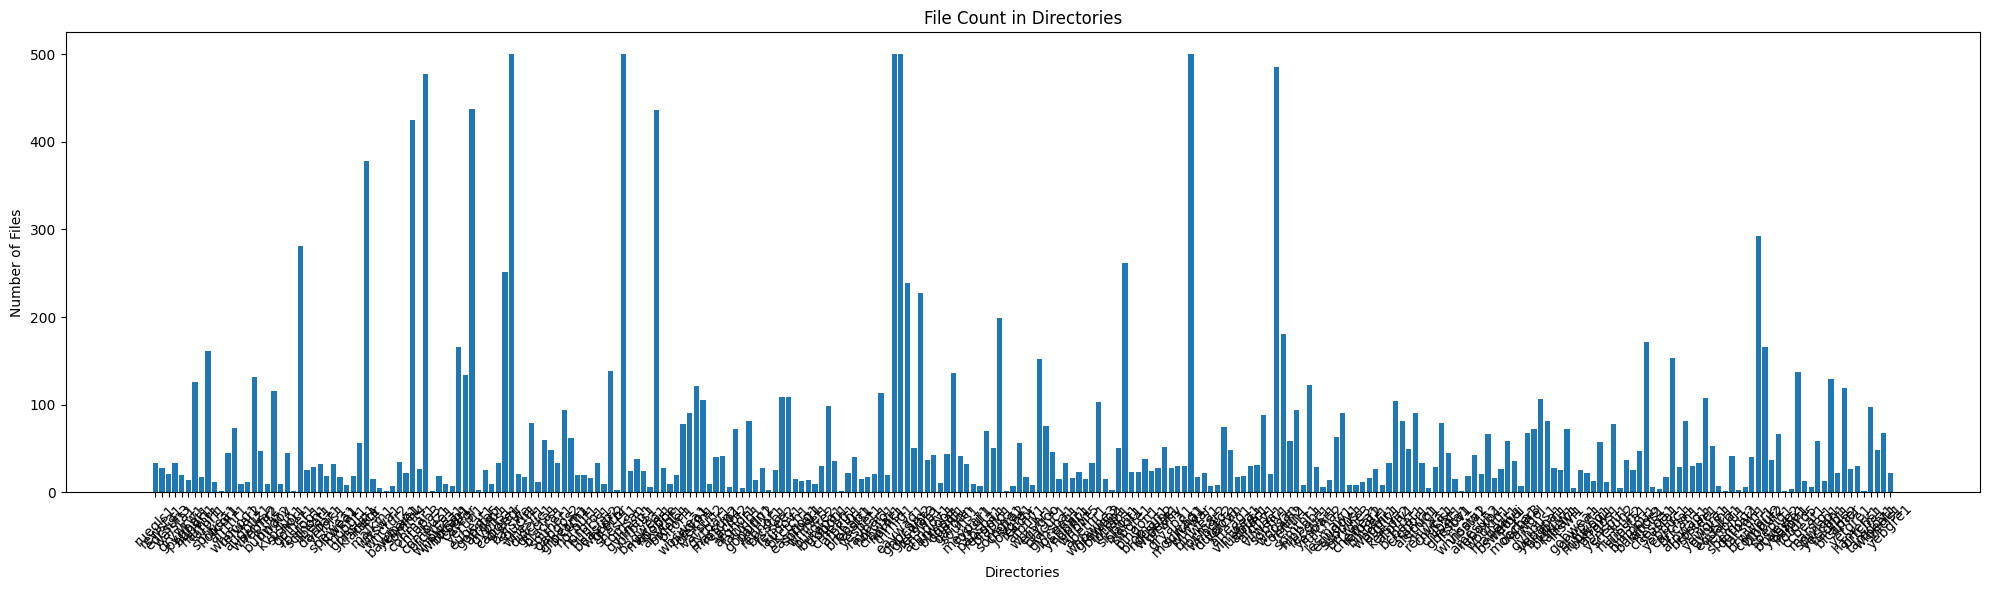

In [14]:
# EDA 
import os
import matplotlib.pyplot as plt

directories = subdirectories 

directory_names = []
file_counts = []

for directory in directories:
    absolute_directory_path = "/Users/namyata/Documents/Fall2023/Deep Learnning/Project/Dataset/birdclef-2023/train_audio/" + directory
    
    if os.path.isdir(absolute_directory_path):
        files = os.listdir(absolute_directory_path)
        file_count = len([f for f in files if os.path.isfile(os.path.join(absolute_directory_path, f))])
        directory_names.append(directory)
        file_counts.append(file_count)
plt.figure(figsize=(20, 6)) 
plt.bar(directory_names, file_counts)
plt.xlabel("Directories")
plt.ylabel("Number of Files")
plt.title("File Count in Directories")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


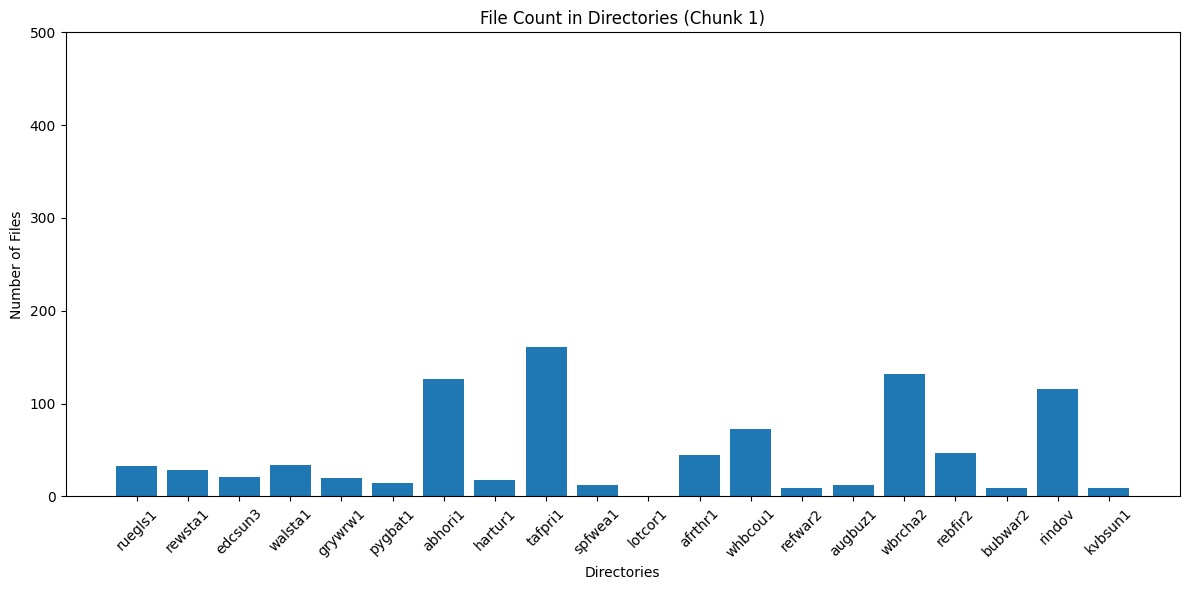

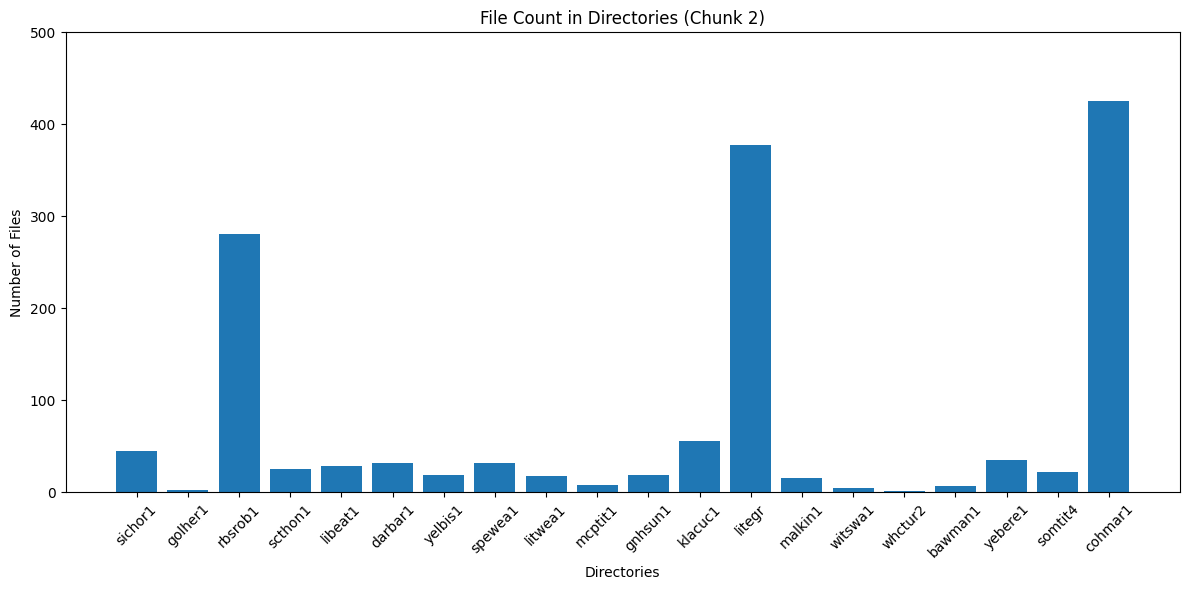

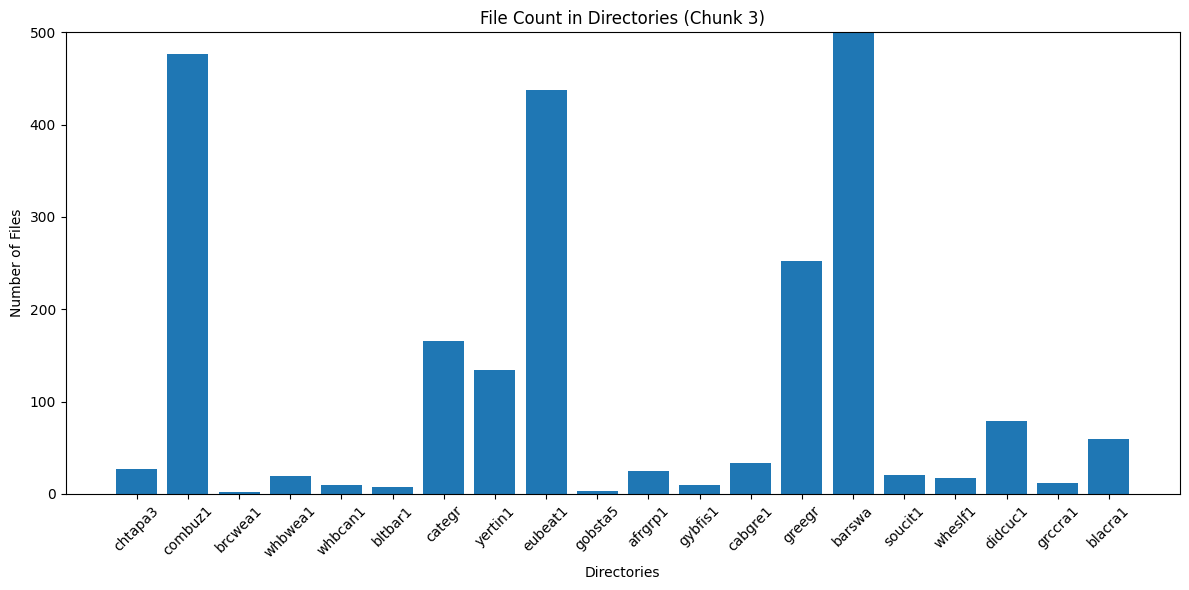

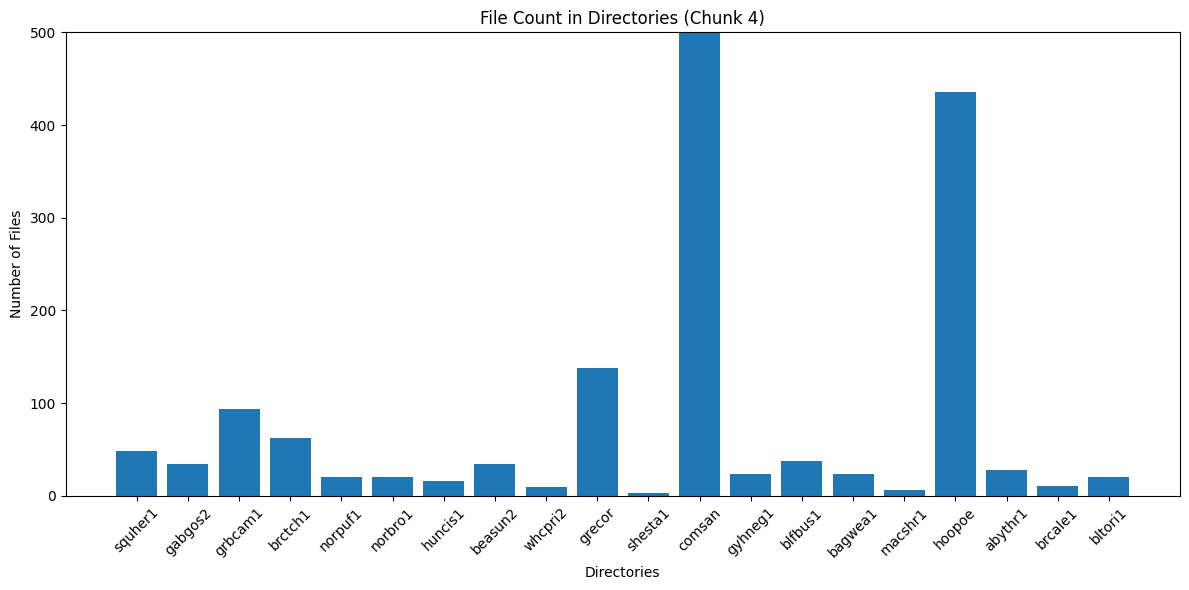

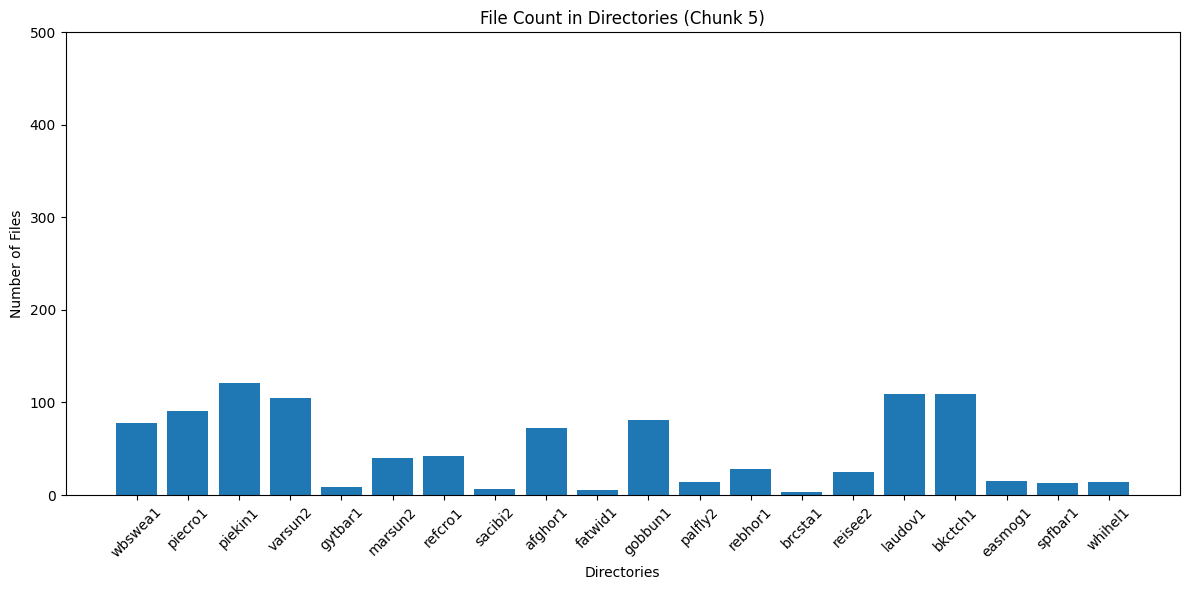

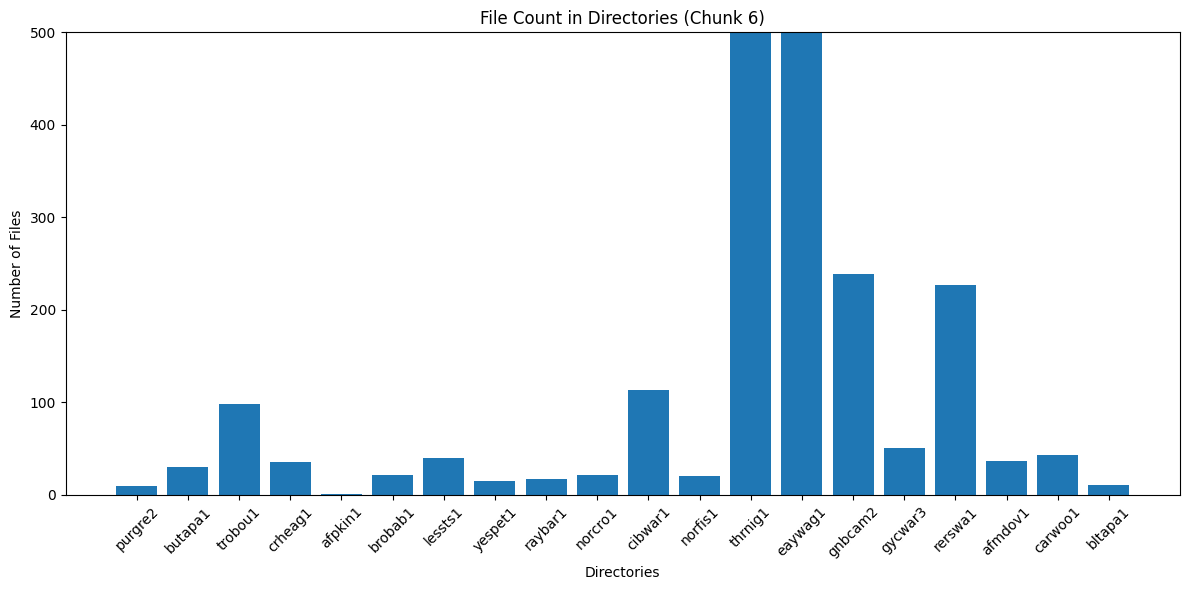

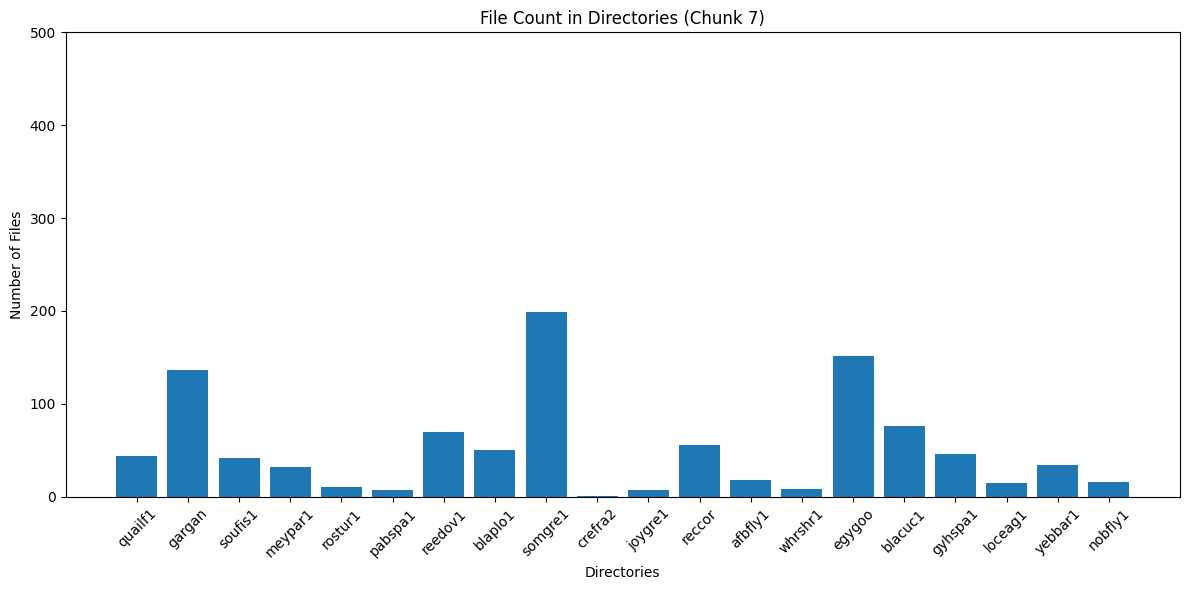

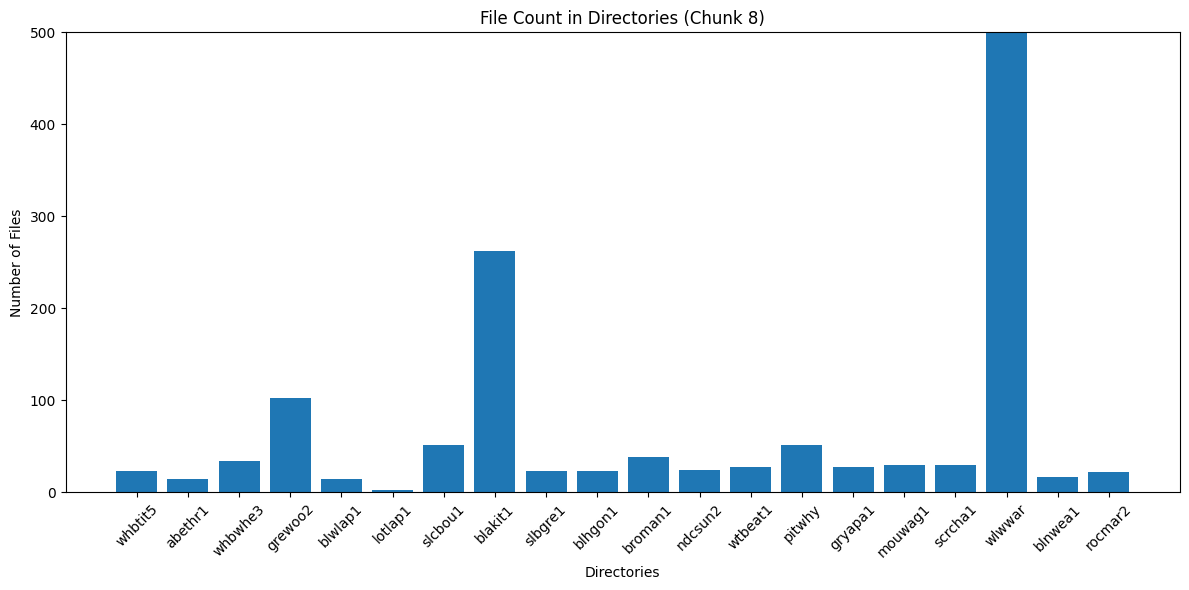

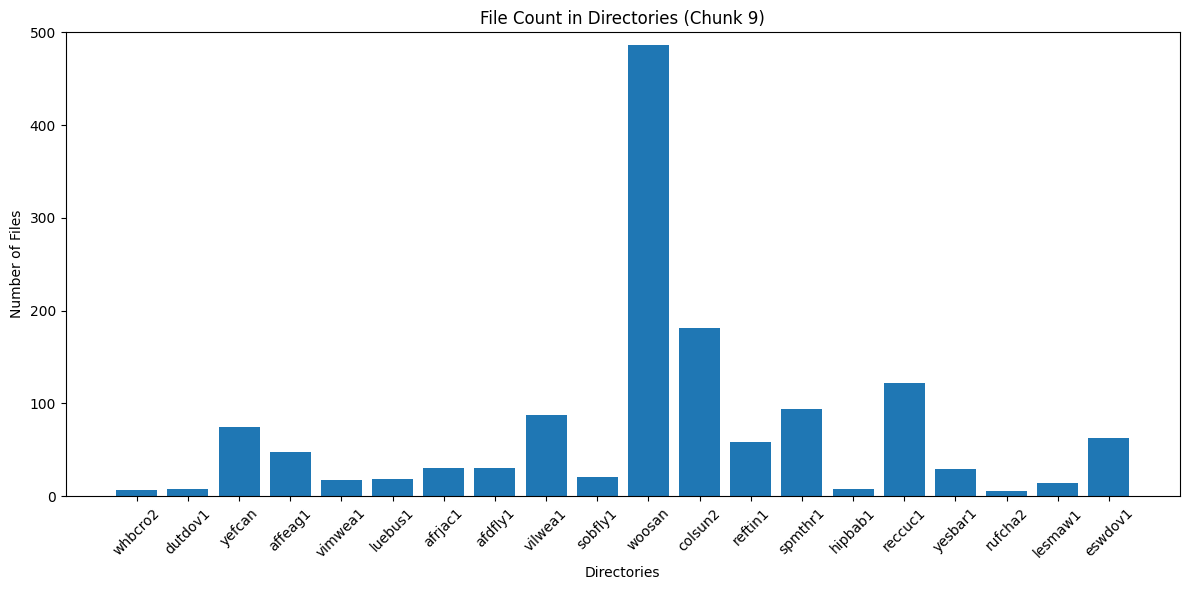

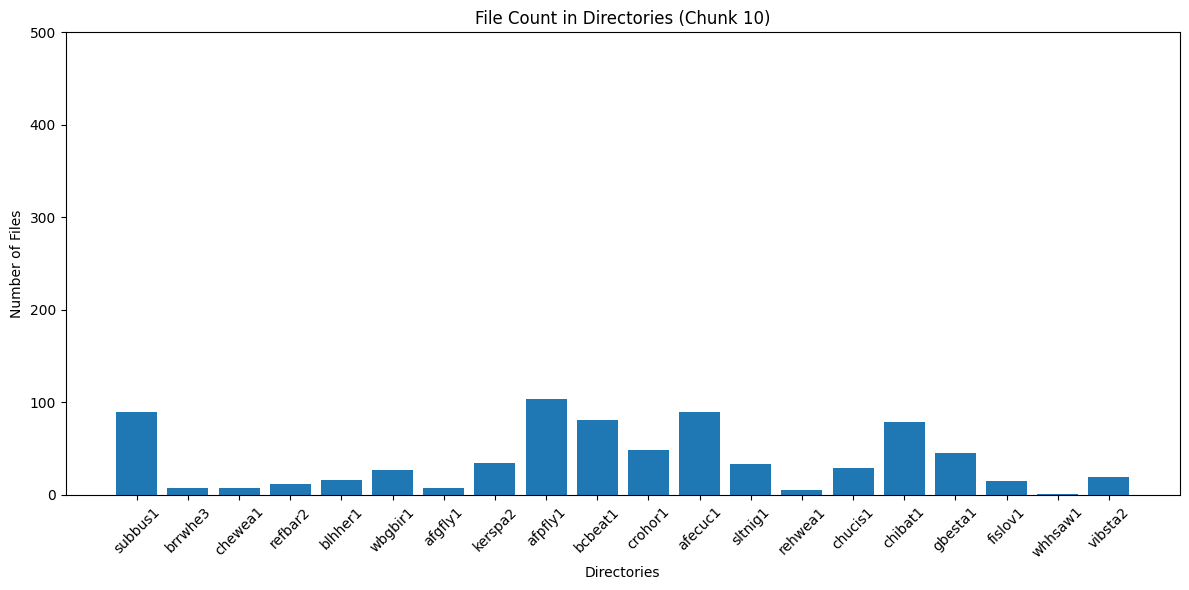

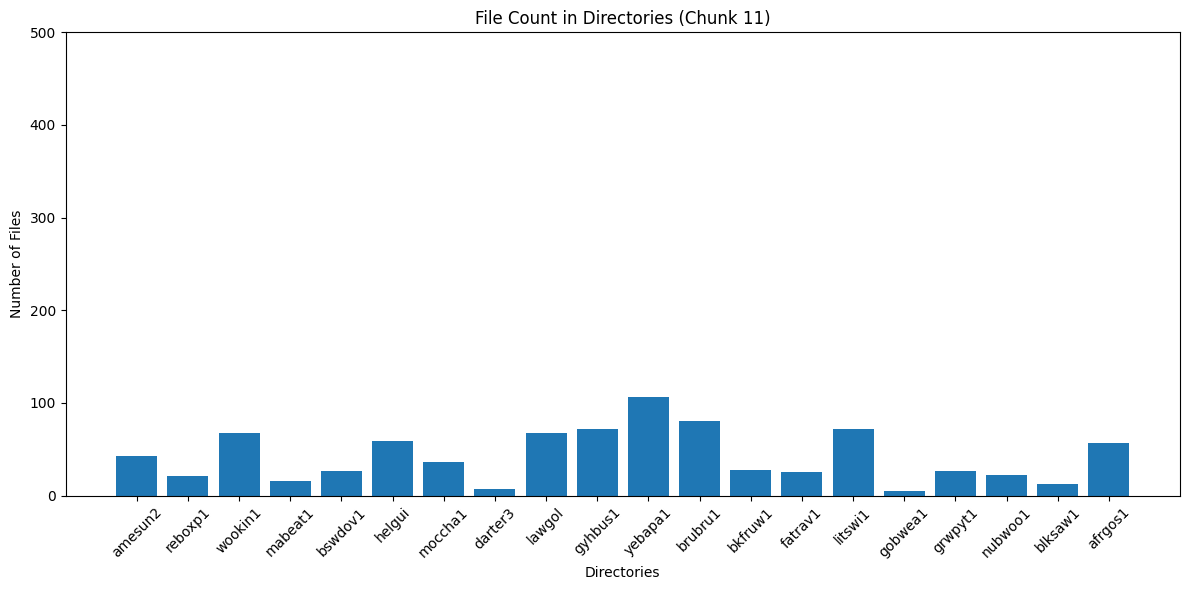

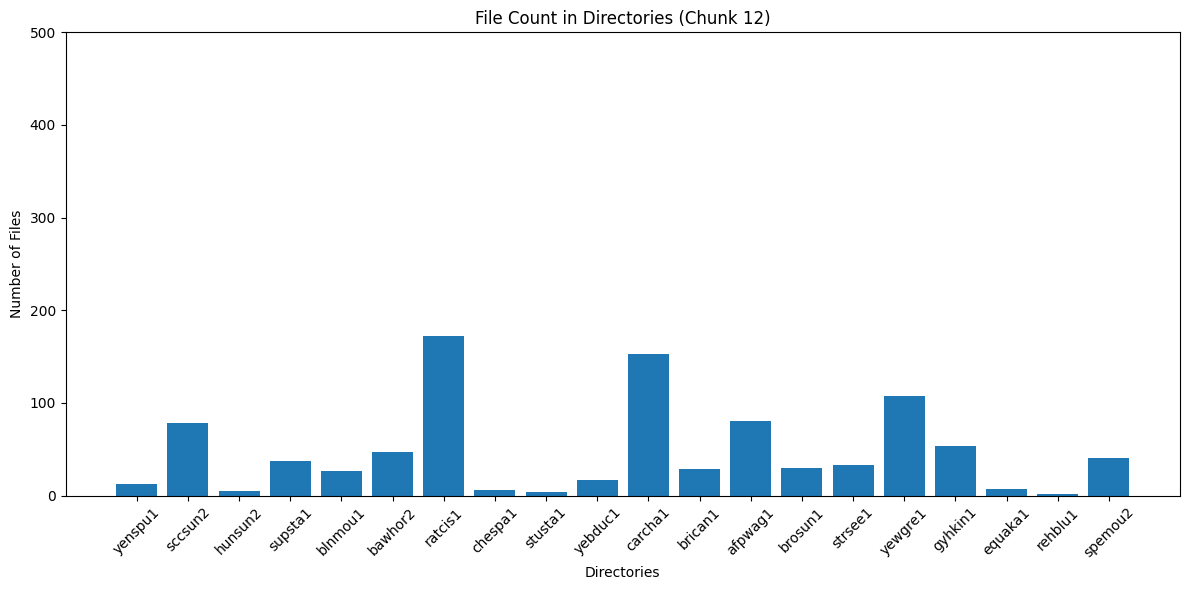

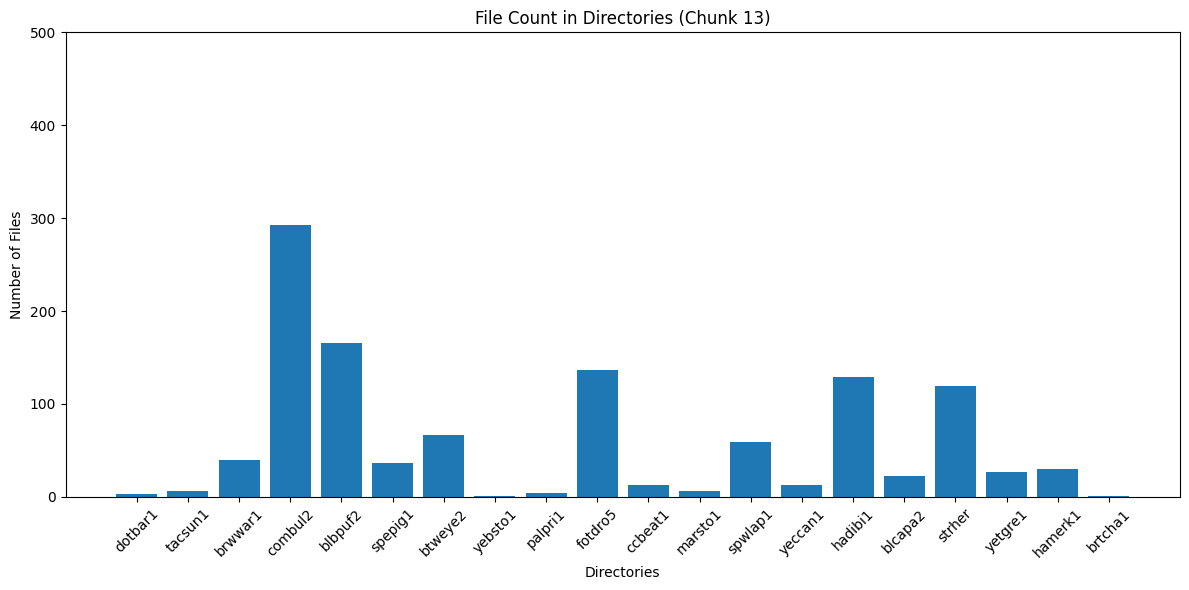

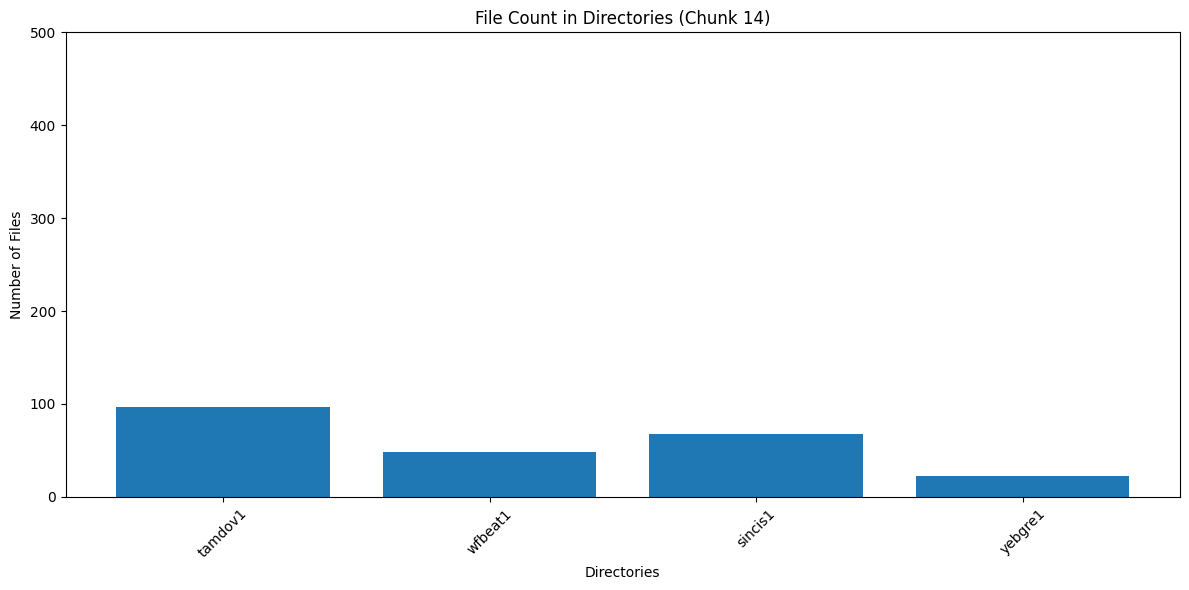

In [20]:
import os
import matplotlib.pyplot as plt
directories = subdirectories
chunk_size = 20
chunks = [directories[i:i + chunk_size] for i in range(0, len(directories), chunk_size)]
max_file_count = 0

for chunk_index, chunk in enumerate(chunks):
    directory_names = []
    file_counts = []

    for directory in chunk:
        absolute_directory_path = "/Users/namyata/Documents/Fall2023/Deep Learnning/Project/Dataset/birdclef-2023/train_audio/" + directory

        if os.path.isdir(absolute_directory_path):
            files = os.listdir(absolute_directory_path)
            file_count = len([f for f in files if os.path.isfile(os.path.join(absolute_directory_path, f))])
            directory_names.append(directory)
            file_counts.append(file_count)
            max_file_count = max(max_file_count, file_count)
    plt.figure(figsize=(12, 6)) 
    plt.bar(directory_names, file_counts)
    plt.xlabel("Directories")
    plt.ylabel("Number of Files")
    plt.title(f"File Count in Directories (Chunk {chunk_index + 1})")
    plt.xticks(rotation=45, fontsize=10) 
    plt.ylim(0, 500)

    plt.tight_layout()

    plt.show()


In [7]:

root_folder = 'birdclef-2023-3'
audio_folder = root_folder + '/train_audio'
output_folder = 'birdclef-2023-spectrograms'
WINDOW_SIZE = 20

In [8]:
# Preprocesing 

def split_array(arr, chunk_size):
    """Split an array into smaller subarrays of the specified length."""
    return [arr[i:i + chunk_size] for i in range(0, len(arr), chunk_size)]

def getListClippedAudio(audio, sample_rate):
    duration = librosa.get_duration(y=audio)
    total_single_clip_samples = WINDOW_SIZE * sample_rate
    final_audio = []
    if duration < WINDOW_SIZE:
        num_repeats = int(WINDOW_SIZE // duration)
        repeated_audio = np.tile(audio, num_repeats)
        remaining_samples = total_single_clip_samples - len(repeated_audio)
        remaining_audio = audio[0:remaining_samples]
        final_audio.append(np.append(repeated_audio, remaining_audio))
    else:
        final_audio = split_array(audio, total_single_clip_samples)
        len_last = len(final_audio[-1])
        if len_last < total_single_clip_samples:
            final_audio[-1] = np.append(final_audio[-1], final_audio[0][0:total_single_clip_samples-len_last])
    return final_audio


In [9]:
# Functions for saving Sprectrograms
def create_and_save_spectrograms(audio_clips, sample_rate, file_name, folder_path):
    # Create the output directory if it doesn't exist
    output_dir = os.path.join(folder_path.replace(root_folder, output_folder))
    os.makedirs(output_dir, exist_ok=True)

    for i, audio_clip in enumerate(audio_clips):
        # Define the filename for the spectrogram (you can modify this as needed)
        spectrogram_filename = f"{os.path.splitext(file_name)[0]}_clip_{i}.png"
        spectrogram_path = os.path.join(output_dir, spectrogram_filename)

        # Create and save the spectrogram
        plt.figure(figsize=(6, 4))
        spectrogram = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=audio_clip, sr=sample_rate), ref=np.max)
        librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.savefig(spectrogram_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Saved {spectrogram_filename}")

In [10]:


durations = []

for root, dirs, files in os.walk(audio_folder):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        for file in os.listdir(dir_path):
            if file.endswith('.ogg'):
                file_path = os.path.join(dir_path, file)
                audio, sample_rate = librosa.load(file_path)
                audio_clips = getListClippedAudio(audio, sample_rate)
                for audio_clip in audio_clips:
                    print(file, librosa.get_duration(y=audio_clip))

                create_and_save_spectrograms(audio_clips, sample_rate, file, dir_path)

# print("min", min(durations))
# print("max", max(durations))
# print("mean", sum(durations)/len(durations))
# # Create a histogram of audio durations
# plt.hist(durations, bins=int(max(durations))//10, edgecolor='k')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Number of Files')
# plt.title('Audio File Durations Histogram')
# plt.show()

XC128013.ogg 20.0
XC128013.ogg 20.0
XC128013.ogg 20.0
Saved XC128013_clip_0.png
Saved XC128013_clip_1.png
Saved XC128013_clip_2.png
XC363501.ogg 20.0
Saved XC363501_clip_0.png
XC363502.ogg 20.0
XC363502.ogg 20.0
Saved XC363502_clip_0.png
Saved XC363502_clip_1.png
XC363503.ogg 20.0
XC363503.ogg 20.0
Saved XC363503_clip_0.png
Saved XC363503_clip_1.png
XC363504.ogg 20.0
XC363504.ogg 20.0
XC363504.ogg 20.0
Saved XC363504_clip_0.png
Saved XC363504_clip_1.png
Saved XC363504_clip_2.png
XC379322.ogg 20.0
Saved XC379322_clip_0.png
XC432639.ogg 20.0
XC432639.ogg 20.0
Saved XC432639_clip_0.png
Saved XC432639_clip_1.png
XC467121.ogg 20.0
XC467121.ogg 20.0
XC467121.ogg 20.0
Saved XC467121_clip_0.png
Saved XC467121_clip_1.png
Saved XC467121_clip_2.png
XC467122.ogg 20.0
XC467122.ogg 20.0
Saved XC467122_clip_0.png
Saved XC467122_clip_1.png
XC531557.ogg 20.0
Saved XC531557_clip_0.png
XC585802.ogg 20.0
Saved XC585802_clip_0.png
XC606253.ogg 20.0
XC606253.ogg 20.0
Saved XC606253_clip_0.png
Saved XC606253